In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='darkgrid', font_scale=1.5)

In [10]:
data_df = pd.read_csv('data.csv', index_col='data_id')
person_df = pd.read_csv('person.csv', index_col='_id')

In [11]:
data_df.head()

,_id,x,y,z
data_id,,,,
0,1,13916,-1172,-8424
1,1,13816,-1156,-8304
2,1,14188,-1256,-8012
3,1,14128,-1360,-8100
4,1,14228,-832,-7976


In [27]:
person_df

,height,mass,position,is_valid,age,sex
_id,,,,,,
2,185,75,1,0,18,1
3,185,75,2,0,18,1
6,185,75,3,0,18,1
7,185,75,1,1,18,1
8,185,75,2,1,18,1
9,185,75,3,1,18,1
10,178,68,1,0,18,1
13,178,68,2,0,18,1
14,178,68,3,0,18,1


### Фиксим данные

In [3]:
data_df = data_df.drop_duplicates(ignore_index=True)

In [4]:
data_df['z'] = -data_df['z'].abs()

In [13]:
data_df = data_df.drop(data_df[data_df['_id'] == 1].index)
person_df = person_df.drop(1)

In [14]:
data_df.groupby(by='_id', sort=False).mean()

,x,y,z
_id,,,
2,10398.993311,1220.230769,-12743.739130
3,12969.669749,-36.354029,-10092.491413
6,12765.113725,815.027451,-10411.811765
7,15146.131868,-1865.611722,-6243.567766
8,15474.915254,-1894.415254,-5328.025424
9,15071.435323,-1579.159204,-6577.519900
10,6096.206406,1230.916370,-15212.756228
13,11556.967213,856.890068,-11449.663452
14,12002.647646,1024.348074,-11312.720875


# Работаем с Z координатами.

In [16]:
z_data = data_df[['_id', 'z']]

### Смещаем относительно среднего

In [18]:
z_mean = round(data_df.mean()['z'])

In [19]:
mean_bias_z = z_data.copy()
mean_bias_z['z'] = z_data['z'] - z_mean

In [20]:
bound_id = [2, 10, 19, 25, 31]
bound_idx = [mean_bias_z[mean_bias_z['_id'] == x].index[0] for x in bound_id]

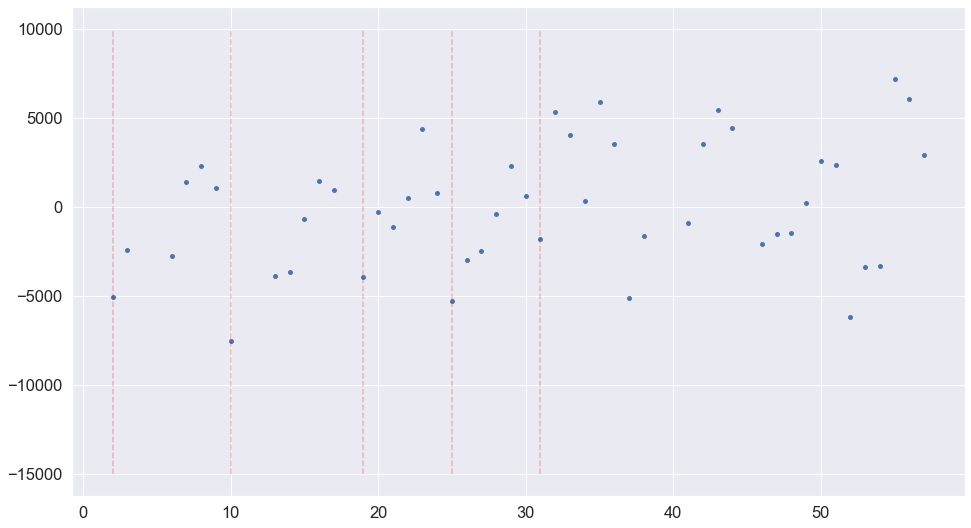

In [21]:
plt.figure(figsize=(16, 9))
grouped_z = mean_bias_z.groupby(by='_id', sort=False).mean()
plt.scatter(grouped_z.index, grouped_z['z'], s=15)
plt.vlines(bound_id, ymin=-15000, ymax=10000, color='red', ls='--', alpha=0.25)
plt.show()

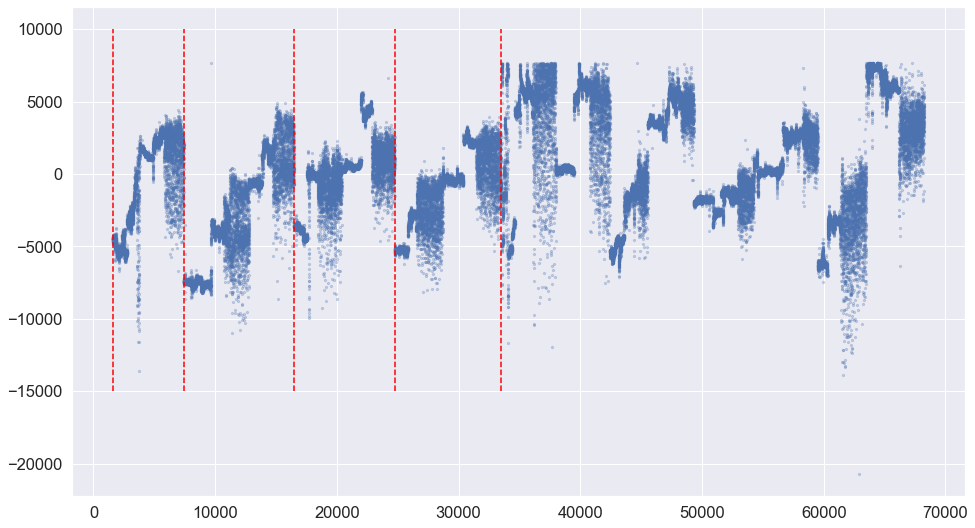

In [22]:
plt.figure(figsize=(16, 9))
plt.scatter(mean_bias_z.index, mean_bias_z['z'], alpha=0.25, s=5)
plt.vlines(bound_idx, ymin=-15000, ymax=10000, color='red', ls='--')
plt.show()

### Смещаем относительно минимума

In [23]:
z_min = round(data_df.min()['z'])

In [24]:
min_bias_z = z_data.copy()
min_bias_z['z'] = min_bias_z['z'] - z_min

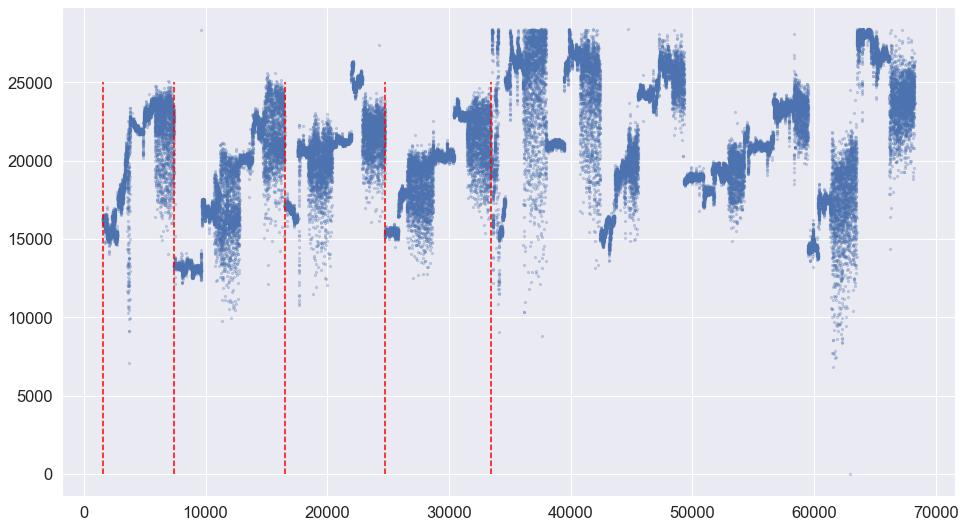

In [25]:
plt.figure(figsize=(16, 9))
plt.scatter(min_bias_z.index, min_bias_z['z'], alpha=0.25, s=5)
plt.vlines(bound_idx, ymin=0, ymax=25000, color='red', ls='--')
plt.show()

### Рассмотрим графики по различным положениям.

In [40]:
positisions = [1, 2, 3]
valids = [0, 1]

In [41]:
grouped_z = z_data.groupby(by='_id', sort=False).mean()
grouped_z

,z
_id,
2,-12743.739130
3,-10092.491413
6,-10411.811765
7,-6243.567766
8,-5328.025424
9,-6577.519900
10,-15212.756228
13,-11449.663452
14,-11312.720875


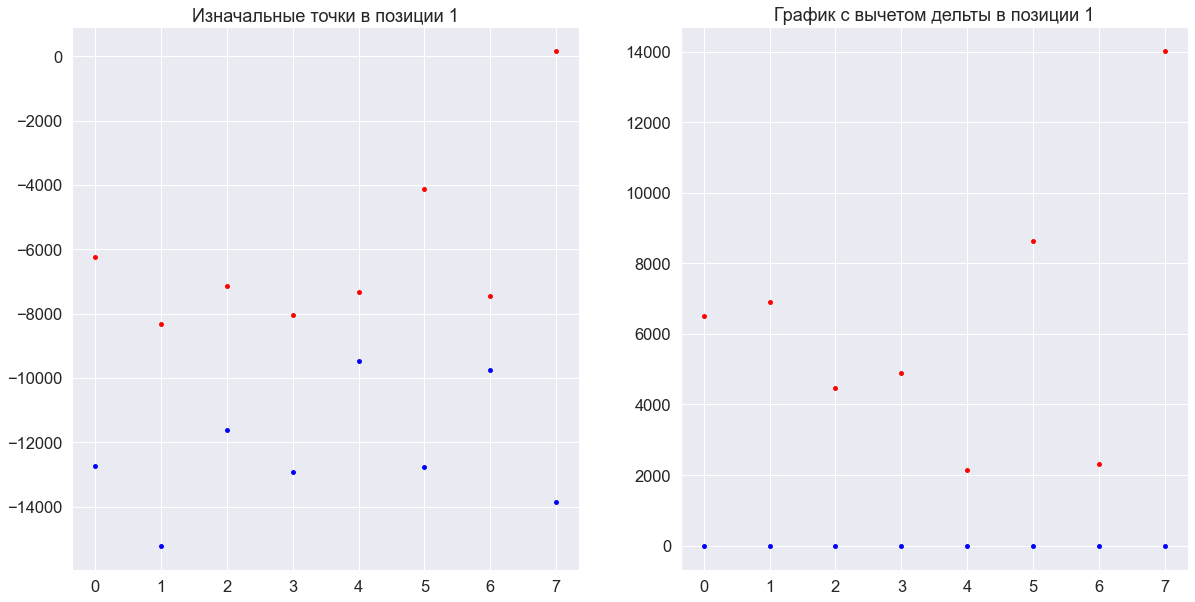

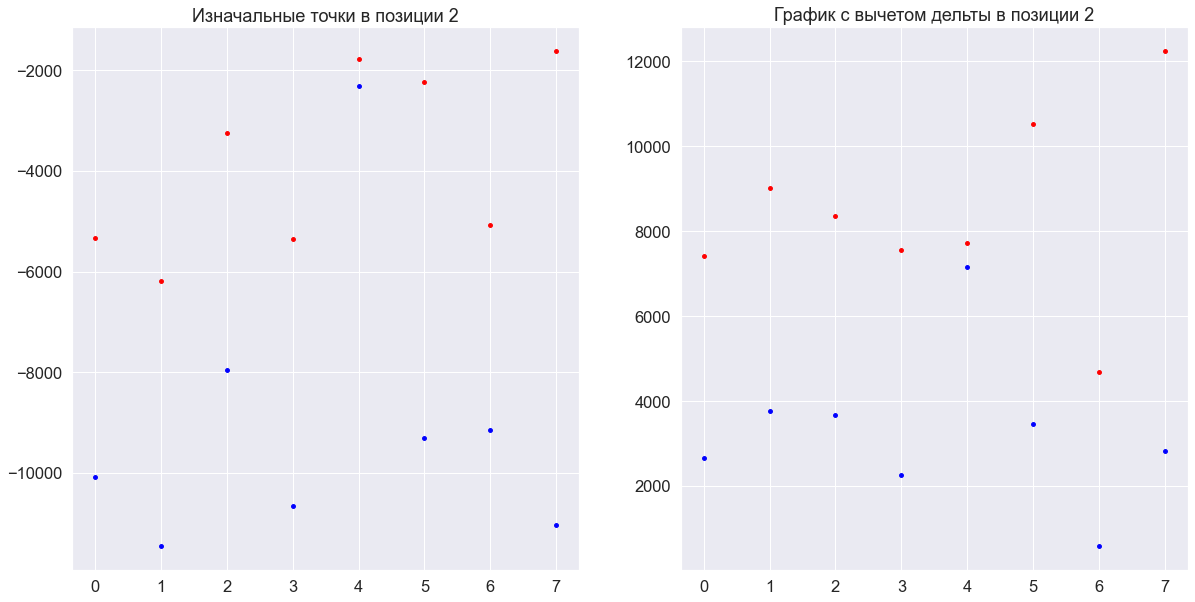

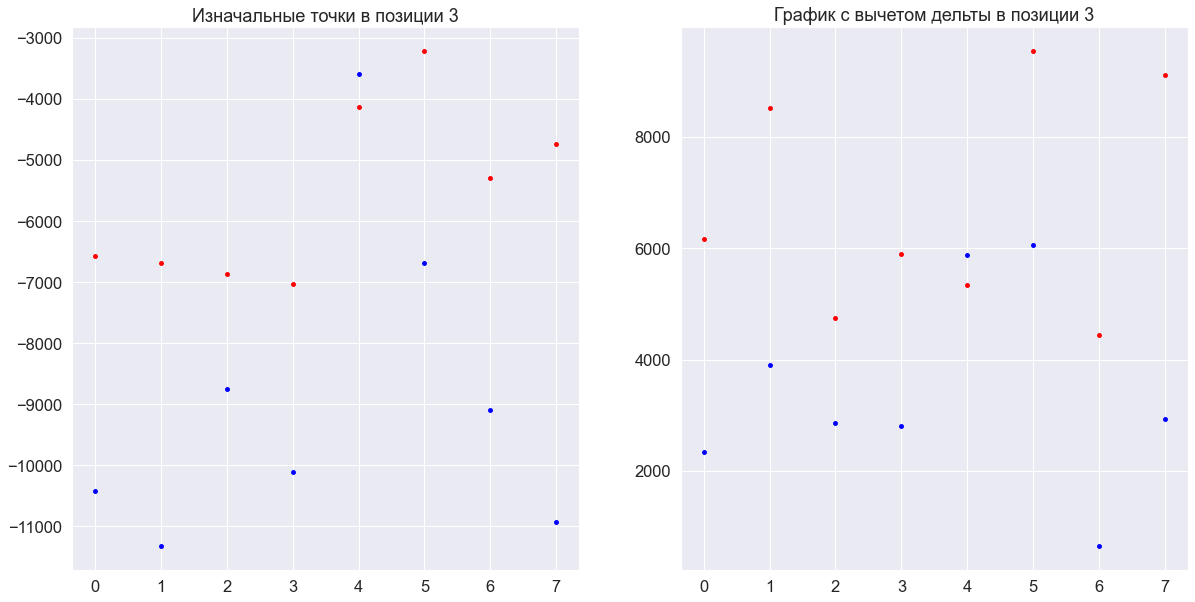

In [42]:
for pos in positisions:
    mask_1 = person_df[(person_df['position'] == pos) & (person_df['is_valid'] == 0)].index
    mask_2 = person_df[(person_df['position'] == pos) & (person_df['is_valid'] == 1)].index
    data_1 = grouped_z.loc[mask_1].reset_index(drop=True)
    data_2 = grouped_z.loc[mask_2].reset_index(drop=True)

    
    plt.figure(figsize=(20, 10))
    
    # Изначальные точки
    plt.subplot(1, 2, 1)
    plt.scatter(data_1.index, data_1, s=15, color='blue')
    plt.scatter(data_2.index, data_2, s=15, color='red')
    plt.title(f'Изначальные точки в позиции {pos}')
    
    # График c вычетом дельты
    plt.subplot(1, 2, 2)
    if pos == 1:
        delta = data_1
    plt.scatter(data_1.index, data_1 - delta, s=15, color='blue')
    plt.scatter(data_2.index, data_2 - delta, s=15, color='red')
    plt.title(f'График с вычетом дельты в позиции {pos}')
    
    plt.show()

Бага в данных:

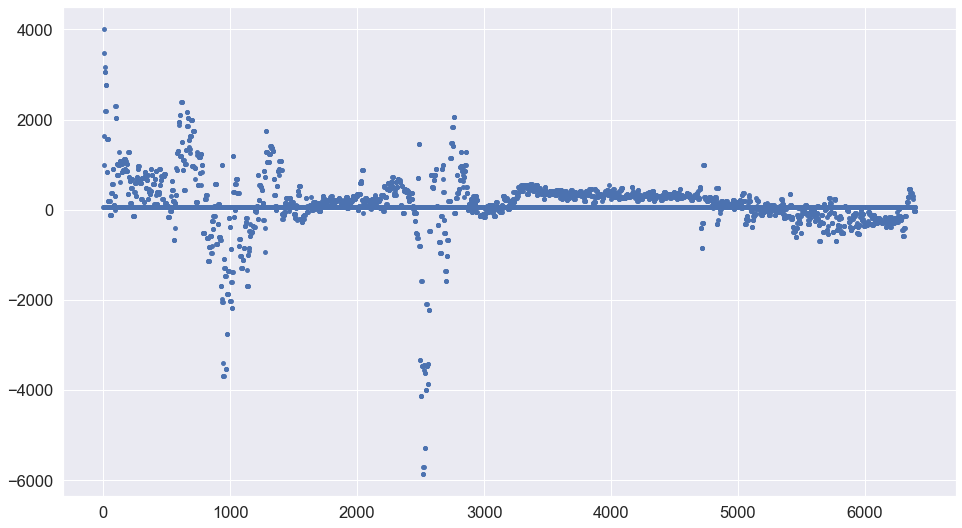

In [36]:
temp = z_data[z_data['_id'] == 55]

plt.figure(figsize=(16, 9))
plt.scatter(np.arange(temp.size), temp, s=15)
plt.show()

Также данные с 37 по 44 - плохие.

### Изучим корреляцию:

In [73]:
corr_data = pd.DataFrame(columns=['_id', 'pos_1', 'pos_2', 'pos_3']).set_index('_id')

In [74]:
mask_1 = person_df[(person_df['position'] == 1) & (person_df['is_valid'] == 0)].index
mask_2 = person_df[(person_df['position'] == 2) & (person_df['is_valid'] == 0)].index
mask_3 = person_df[(person_df['position'] == 3) & (person_df['is_valid'] == 0)].index

data_1 = grouped_z.loc[mask_1].reset_index(drop=True)
data_2 = grouped_z.loc[mask_2].reset_index(drop=True)
data_3 = grouped_z.loc[mask_3].reset_index(drop=True)

In [78]:
corr_data = pd.DataFrame(
    {
        '_id' : data_1.index,
        'pos_1' : data_1['z'].values,
        'pos_2' : data_2['z'].values,
        'pos_3' : data_3['z'].values
    }
).set_index('_id')

In [79]:
corr_data.corr()

,pos_1,pos_2,pos_3
pos_1,1.000000,0.779073,0.713111
pos_2,0.779073,1.000000,0.919269
pos_3,0.713111,0.919269,1.000000
